In [5]:
import pandas as pd
df = pd.read_csv("house.csv")
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [7]:
# top most important feature: 
# net_sqm
# bedroom_count
# center_distance
# metro_distance
# age
# floor

In [10]:
# house price = 50,000 + (100 * net_sqm) + (15,000 * bedroom_count) 
                # - (2000 * age)

In [ ]:
# lab 07.11.2025

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add target column (median house value)
df['MedHouseVal'] = housing.target

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
df = df[(df['AveRooms'] < 60) & 
        (df['AveBedrms'] < 15) & 
        (df['Population'] < 15000) &
        (df['AveOccup'] < 20)]


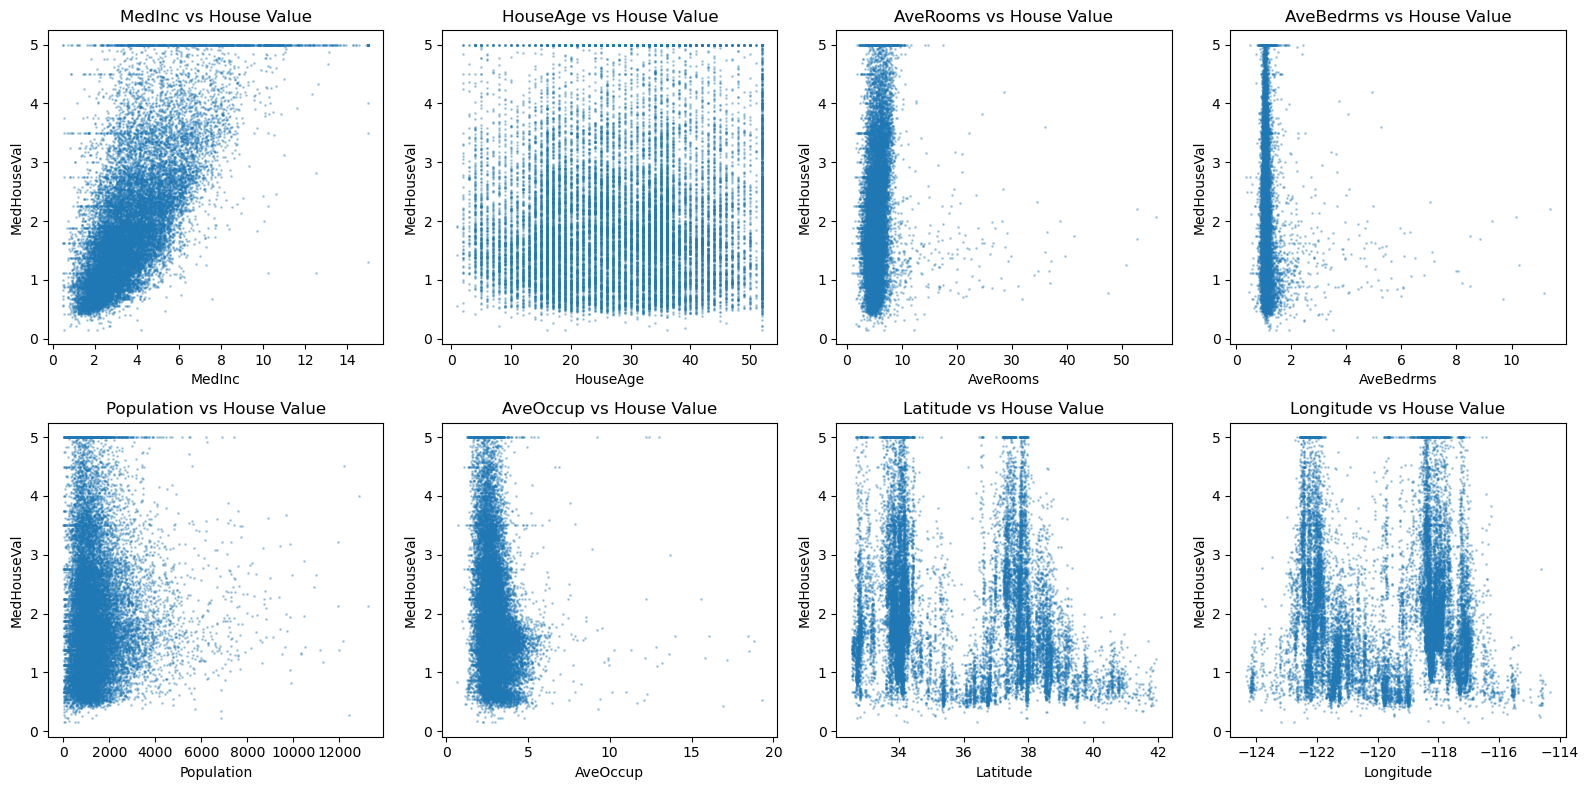

In [70]:
fig, axes = plt.subplots(2, 4, figsize = (16, 8))
axes = axes.ravel()
for idx, col in enumerate(df.columns[:-1]):
    axes[idx].scatter(df[col], df['MedHouseVal'], alpha = 0.3, s=1)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("MedHouseVal")
    axes[idx].set_title(f"{col} vs House Value")

plt.tight_layout()
plt.show()
    

In [142]:
# buil basic multivariance regression

X = df[['MedInc', 'HouseAge', 'Population', 'AveBedrms']]
y = df['MedHouseVal']

print(X)
print(y)

       MedInc  HouseAge  Population  AveBedrms
0      8.3252      41.0       322.0   1.023810
1      8.3014      21.0      2401.0   0.971880
2      7.2574      52.0       496.0   1.073446
3      5.6431      52.0       558.0   1.073059
4      3.8462      52.0       565.0   1.081081
...       ...       ...         ...        ...
20635  1.5603      25.0       845.0   1.133333
20636  2.5568      18.0       356.0   1.315789
20637  1.7000      17.0      1007.0   1.120092
20638  1.8672      18.0       741.0   1.171920
20639  2.3886      16.0      1387.0   1.162264

[20619 rows x 4 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20619, dtype: float64


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(y_train)

       MedInc  HouseAge  Population  AveBedrms
15323  2.7386      12.0      3015.0   1.220641
8357   3.8512      47.0       954.0   1.011204
16464  3.8672      15.0      1178.0   1.024000
20354  7.0242      18.0      3419.0   0.964083
5850   3.0179      49.0        83.0   1.078947
...       ...       ...         ...        ...
11295  3.1726      29.0      2683.0   1.099886
11976  4.5625      12.0      5008.0   1.016756
5394   2.6402      43.0       705.0   1.036585
860    5.7192      15.0      1777.0   1.067979
15813  3.3937      52.0      2280.0   1.107807

[16495 rows x 4 columns]
15323    2.161
8357     1.713
16464    1.201
20354    2.931
5850     1.188
         ...  
11295    1.987
11976    1.713
5394     1.857
860      2.835
15813    2.700
Name: MedHouseVal, Length: 16495, dtype: float64


In [146]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [148]:
print(f'MedHouseVal = {model.intercept_:.4f}')
for feature, coef in zip(X.columns, model.coef_):
    print(f"    + ({coef:.4f}) * {feature}")

MedHouseVal = -0.2477
    + (0.4328) * MedInc
    + (0.0189) * HouseAge
    + (0.0000) * Population
    + (0.0380) * AveBedrms


In [153]:
y_pred = model.predict(X_test)
y_pred

array([1.95188575, 1.81081425, 2.03441956, ..., 2.02389137, 1.5778634 ,
       1.15046073])

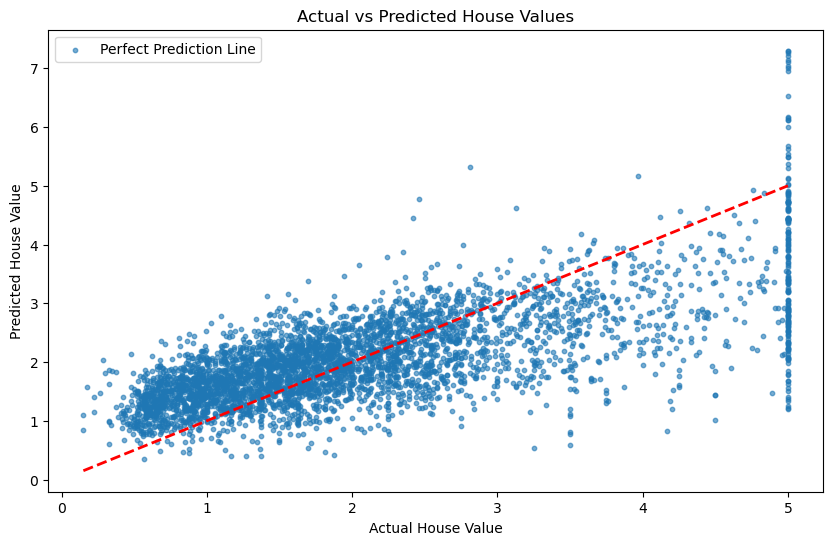

In [159]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values")
plt.legend(["Perfect Prediction Line"])
plt.show()


In [189]:
# function for adjusted R^2
def adjusted_r2(r2, n, k):
    """
    r2: R-Squared value
    n: number of observations
    k: number of predictors
    """
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# define target variable
y = df["MedHouseVal"]

# build models with different numbers of predictors
models_comparison = []

# model 1, single predictor
X1 = df[["MedInc"]]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression().fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

# metrics
r2_1 = r2_score(y1_test, y1_pred)
adj_r2_1 = adjusted_r2(r2_1, len(X1_test), X1.shape[1])
mse_1 = mean_squared_error(y1_test, y1_pred)

models_comparison.append({
    'Model': 'Model 1 (MedInc Only)',
    'Features': 1,
    'R^2': r2_1,
    'Adjusted R^2': adj_r2_1,
    'MSE': mse_1,
    'RMSE': np.sqrt(mse_1)
})

In [191]:
# model 2, second predictor
X2 = df[["MedInc","HouseAge"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression().fit(X2_train, y2_train)
y2_pred = model2.predict(X1_test)

# metrics
r2_2 = r2_score(y2_test, y2_pred)
adj_r2_2 = adjusted_r2(r2_2, len(X2_test), X2.shape[1])
mse_2 = mean_squared_error(y2_test, y2_pred)

models_comparison.append({
    'Model': 'Model 2 (MedInc + House Age)',
    'Features': 2,
    'R^2': r2_2,
    'Adjusted R^2': adj_r2_2,
    'MSE': mse_2,
    'RMSE': np.sqrt(mse_2)
})

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- HouseAge


In [193]:
# model 3, thre predictors
X3 = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms"]]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

model3 = LinearRegression().fit(X3_train, y3_train)
y3_pred = model3.predict(X3_test)

# metrics
r2_3 = r2_score(y3_test, y3_pred)
adj_r2_3 = adjusted_r2(r2_3, len(X3_test), X3.shape[1])
mse_3 = mean_squared_error(y3_test, y3_pred)

models_comparison.append({
    'Model': 'Model 3 (MedInc + HouseAge + AveRooms + AveBedrms)',
    'Features': 3,
    'R^2': r2_3,
    'Adjusted R^2': adj_r2_3,
    'MSE': mse_3,
    'RMSE': np.sqrt(mse_3)
})


In [195]:
# model 4, four predictors
X4 = df.drop('MedHouseVal', axis=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X3, y, test_size=0.2, random_state=42)

model4 = LinearRegression().fit(X4_train, y4_train)
y4_pred = model4.predict(X4_test)

# metrics
r2_4 = r2_score(y4_test, y4_pred)
adj_r2_4 = adjusted_r2(r2_4, len(X4_test), X4.shape[1])
mse_4 = mean_squared_error(y4_test, y4_pred)

models_comparison.append({
    'Model': 'Model 4 (all columns)',
    'Features': 4,
    'R^2': r2_4,
    'Adjusted R^2': adj_r2_4,
    'MSE': mse_4,
    'RMSE': np.sqrt(mse_4)
})


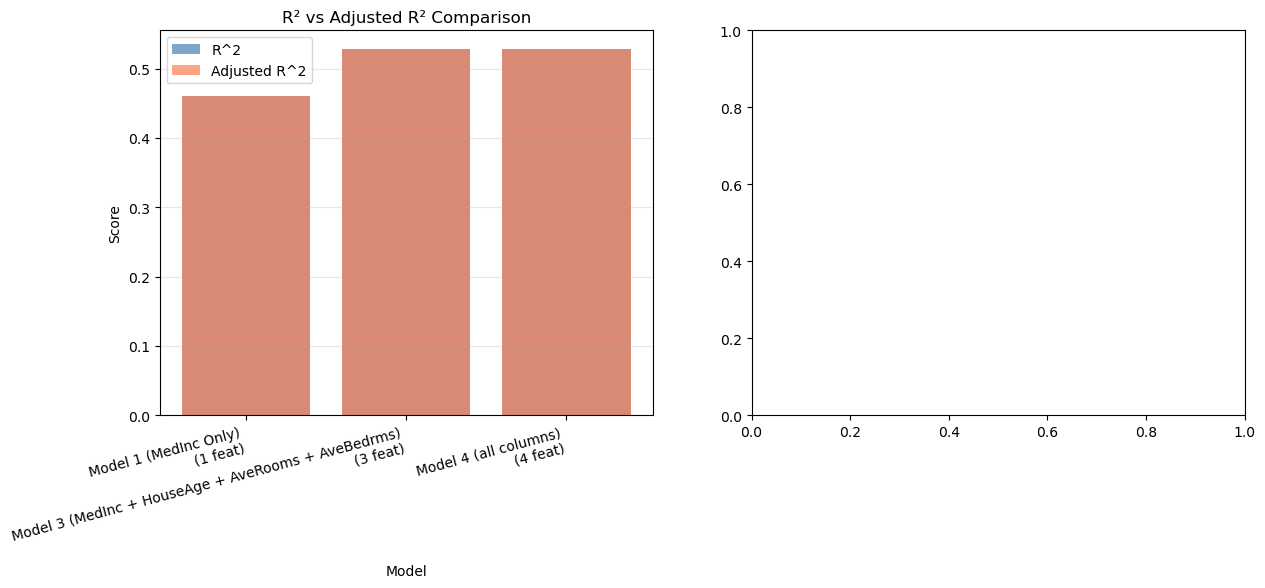

In [217]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Left plot: R^2 comparison ---
axes[0].bar(range(len(models_comparison)), [m['R^2'] for m in models_comparison],
             color='steelblue', alpha=0.7, label='R^2')
axes[0].bar(range(len(models_comparison)), [m['Adjusted R^2'] for m in models_comparison],
             color='coral', alpha=0.7, label='Adjusted R^2')

axes[0].set_xlabel("Model")
axes[0].set_ylabel("Score")
axes[0].set_title("R² vs Adjusted R² Comparison")
axes[0].set_xticks(range(len(models_comparison)))
axes[0].set_xticklabels(
    [f"{m['Model']}\n({m['Features']} feat)" for m in models_comparison],
    rotation=15, ha='right'
)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)


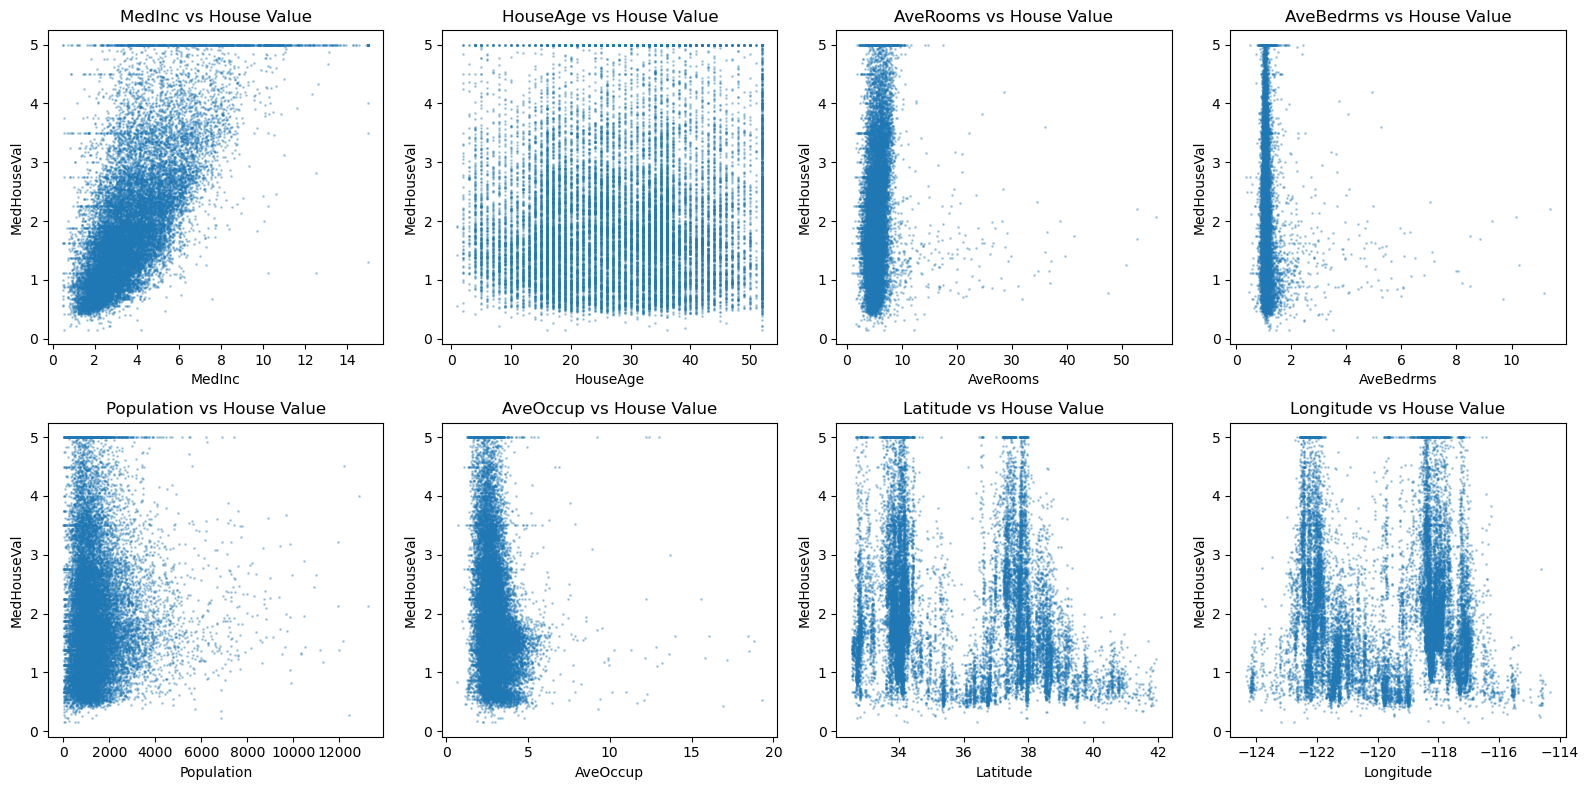

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Remove extreme outliers
df = df[(df['AveRooms'] < 60) & 
        (df['AveBedrms'] < 15) & 
        (df['Population'] < 15000) &
        (df['AveOccup'] < 20)]

# Scatter plots of features vs target
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()
for idx, col in enumerate(df.columns[:-1]):
    axes[idx].scatter(df[col], df['MedHouseVal'], alpha=0.3, s=1)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("MedHouseVal")
    axes[idx].set_title(f"{col} vs House Value")
plt.tight_layout()
plt.show()

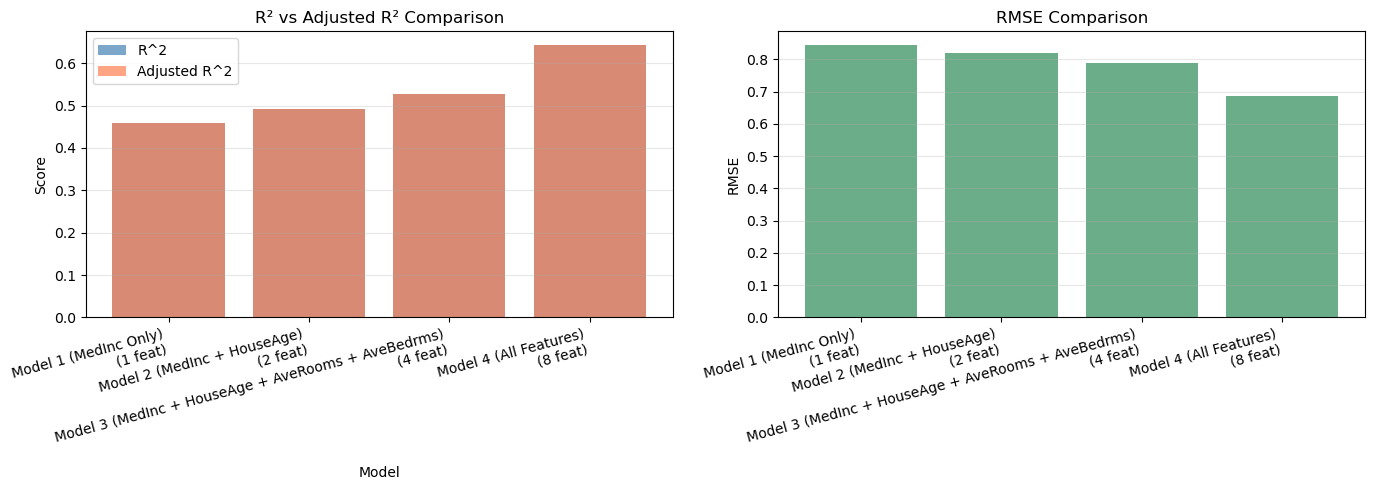

In [229]:

# Function for adjusted R^2
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Define target variable
y = df["MedHouseVal"]

# Store model metrics
models_comparison = []

# --- Model 1: MedInc only ---
X1 = df[["MedInc"]]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression().fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

r2_1 = r2_score(y1_test, y1_pred)
adj_r2_1 = adjusted_r2(r2_1, len(X1_test), X1.shape[1])
mse_1 = mean_squared_error(y1_test, y1_pred)

models_comparison.append({
    'Model': 'Model 1 (MedInc Only)',
    'Features': 1,
    'R^2': r2_1,
    'Adjusted R^2': adj_r2_1,
    'MSE': mse_1,
    'RMSE': np.sqrt(mse_1)
})

# --- Model 2: MedInc + HouseAge ---
X2 = df[["MedInc","HouseAge"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression().fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

r2_2 = r2_score(y2_test, y2_pred)
adj_r2_2 = adjusted_r2(r2_2, len(X2_test), X2.shape[1])
mse_2 = mean_squared_error(y2_test, y2_pred)

models_comparison.append({
    'Model': 'Model 2 (MedInc + HouseAge)',
    'Features': 2,
    'R^2': r2_2,
    'Adjusted R^2': adj_r2_2,
    'MSE': mse_2,
    'RMSE': np.sqrt(mse_2)
})

# --- Model 3: MedInc + HouseAge + AveRooms + AveBedrms ---
X3 = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms"]]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

model3 = LinearRegression().fit(X3_train, y3_train)
y3_pred = model3.predict(X3_test)

r2_3 = r2_score(y3_test, y3_pred)
adj_r2_3 = adjusted_r2(r2_3, len(X3_test), X3.shape[1])
mse_3 = mean_squared_error(y3_test, y3_pred)

models_comparison.append({
    'Model': 'Model 3 (MedInc + HouseAge + AveRooms + AveBedrms)',
    'Features': 4,
    'R^2': r2_3,
    'Adjusted R^2': adj_r2_3,
    'MSE': mse_3,
    'RMSE': np.sqrt(mse_3)
})

# --- Model 4: All features ---
X4 = df.drop('MedHouseVal', axis=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state=42)

model4 = LinearRegression().fit(X4_train, y4_train)
y4_pred = model4.predict(X4_test)

r2_4 = r2_score(y4_test, y4_pred)
adj_r2_4 = adjusted_r2(r2_4, len(X4_test), X4.shape[1])
mse_4 = mean_squared_error(y4_test, y4_pred)

models_comparison.append({
    'Model': 'Model 4 (All Features)',
    'Features': X4.shape[1],
    'R^2': r2_4,
    'Adjusted R^2': adj_r2_4,
    'MSE': mse_4,
    'RMSE': np.sqrt(mse_4)
})

# Plot R^2 vs Adjusted R^2 comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Left plot: R^2 comparison ---
axes[0].bar(range(len(models_comparison)), [m['R^2'] for m in models_comparison],
             color='steelblue', alpha=0.7, label='R^2')
axes[0].bar(range(len(models_comparison)), [m['Adjusted R^2'] for m in models_comparison],
             color='coral', alpha=0.7, label='Adjusted R^2')

axes[0].set_xlabel("Model")
axes[0].set_ylabel("Score")
axes[0].set_title("R² vs Adjusted R² Comparison")
axes[0].set_xticks(range(len(models_comparison)))
axes[0].set_xticklabels(
    [f"{m['Model']}\n({m['Features']} feat)" for m in models_comparison],
    rotation=15, ha='right'
)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# --- Right plot: RMSE comparison ---
axes[1].bar(range(len(models_comparison)), [m['RMSE'] for m in models_comparison],
             color='seagreen', alpha=0.7)
axes[1].set_xticks(range(len(models_comparison)))
axes[1].set_xticklabels(
    [f"{m['Model']}\n({m['Features']} feat)" for m in models_comparison],
    rotation=15, ha='right'
)
axes[1].set_ylabel("RMSE")
axes[1].set_title("RMSE Comparison")
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()